In [53]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [125]:
flight_pickle = '../data/pickled/flights_df.pickle'
with open(flight_pickle, 'rb') as file:
    flights_df = pickle.load(file)

# Convert CityPair to string
flights_df['CityPair'] = flights_df['CityPair'].apply(lambda x: '-'.join(sorted(x)))

In [126]:
# Group by city pairs and sum the passengers
passenger_count = flights_df.groupby(['CityPair'])['PASSENGERS'].sum().reset_index()
pc_top10 = passenger_count.sort_values(by='PASSENGERS', ascending=False).head(10)

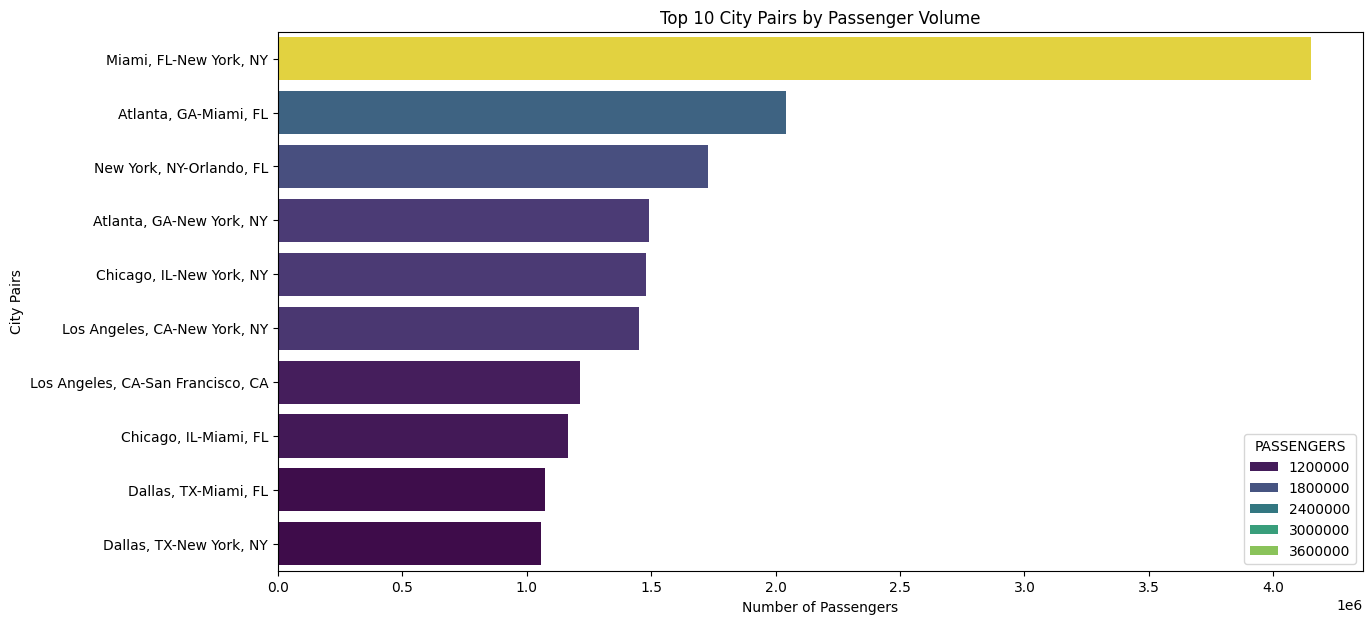

In [127]:
# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='PASSENGERS', y='CityPair', data=pc_top10, hue='PASSENGERS', dodge=False, palette="viridis")
plt.xlabel('Number of Passengers')
plt.ylabel('City Pairs')
plt.title('Top 10 City Pairs by Passenger Volume')
plt.show()

In [128]:
# Group by city pairs and number of flights
num_flights = flights_df.groupby(['CityPair'])['DEPARTURES_PERFORMED'].sum().reset_index()
num_flights.sort_values(by='DEPARTURES_PERFORMED', ascending=False)

,CityPair,DEPARTURES_PERFORMED
3099,"Miami, FL-New York, NY",27408.0
354,"Atlanta, GA-Miami, FL",13423.0
1380,"Chicago, IL-New York, NY",13406.0
906,"Boston, MA-New York, NY",11791.0
3335,"New York, NY-Orlando, FL",11323.0
...,...,...
1589,"Columbia, SC-Hilton Head Island, SC",1.0
1587,"Columbia, SC-Greenville, SC",1.0
1586,"Columbia, SC-Greensboro, NC",1.0
1584,"Columbia, SC-Fayetteville, NC",1.0


In [129]:
# Calculate load factor for flights
flights_df['load_factor'] = flights_df['PASSENGERS'] / flights_df['SEATS']

load_factor = flights_df.groupby(['CityPair']).agg(
    mean_load_factor=('load_factor', 'mean'),
    total_departures=('DEPARTURES_PERFORMED', 'sum'),
).reset_index()
load_factor.loc[load_factor['total_departures']>1000].sort_values(by='mean_load_factor', ascending=False)

,CityPair,mean_load_factor,total_departures
1246,"Charlotte, NC-Phoenix, AZ",0.904234,1931.0
383,"Atlanta, GA-San Diego, CA",0.901361,1251.0
2513,"Honolulu, HI-Las Vegas, NV",0.898333,1003.0
880,"Boston, MA-Denver, CO",0.897450,1917.0
401,"Atlanta, GA-Virginia Beach, VA",0.896270,1383.0
...,...,...,...
2604,"Huntsville, AL-Washington, DC",0.587564,1713.0
205,"Anchorage, AK-Fairbanks, AK",0.585281,1798.0
2512,"Honolulu, HI-Kahului, HI",0.569834,7677.0
337,"Atlanta, GA-Jackson, MS",0.556466,1887.0


In [130]:
# Group by CityPair and Carrier to get number of unique carriers per city pair
carrier_options = flights_df.groupby('CityPair')['UNIQUE_CARRIER'].nunique().reset_index()
carrier_options.rename(columns={'Carrier': 'num_carriers'}, inplace=True)
carrier_options

,CityPair,UNIQUE_CARRIER
0,"Abilene, TX-Alexandria, LA",1
1,"Abilene, TX-Atlanta, GA",1
2,"Abilene, TX-Brownsville, TX",1
3,"Abilene, TX-Chattanooga, TN",1
4,"Abilene, TX-Dallas, TX",3
...,...,...
3825,"Virginia Beach, VA-Wichita, KS",1
3826,"Washington, DC-Wausau, WI",1
3827,"Washington, DC-Wichita, KS",1
3828,"Washington, DC-Wilmington, NC",4


In [131]:
city_pair_info = flights_df.groupby(['CityPair']).agg(
    num_passengers=('PASSENGERS','sum'),
    total_seats=('SEATS','sum'),
    mean_load_factor=('load_factor', 'mean'),
    total_departures=('DEPARTURES_PERFORMED', 'sum'),
    scheduled=('DEPARTURES_SCHEDULED','sum'),
    avg_distance=('DISTANCE','mean'),
    num_carriers=('UNIQUE_CARRIER','nunique')
).reset_index()

# Calculate number of cancelled flights
city_pair_info['percent_cancelled'] = (city_pair_info['scheduled'] - city_pair_info['total_departures']) / city_pair_info['scheduled']

In [132]:
city_pair_info

,CityPair,num_passengers,total_seats,mean_load_factor,total_departures,scheduled,avg_distance,num_carriers,percent_cancelled
0,"Abilene, TX-Alexandria, LA",16.0,150.0,0.106667,1.0,0.0,426.000000,1,-inf
1,"Abilene, TX-Atlanta, GA",188.0,189.0,0.994709,1.0,0.0,889.000000,1,-inf
2,"Abilene, TX-Brownsville, TX",63.0,65.0,0.969231,1.0,1.0,443.000000,1,0.000000
3,"Abilene, TX-Chattanooga, TN",73.0,76.0,0.960526,1.0,1.0,852.000000,1,0.000000
4,"Abilene, TX-Dallas, TX",56164.0,85710.0,0.686558,1165.0,1177.0,158.000000,3,0.010195
...,...,...,...,...,...,...,...,...,...
3825,"Virginia Beach, VA-Wichita, KS",91.0,150.0,0.606667,1.0,0.0,1169.000000,1,-inf
3826,"Washington, DC-Wausau, WI",363.0,372.0,0.975806,2.0,0.0,768.000000,1,-inf
3827,"Washington, DC-Wichita, KS",10775.0,17252.0,0.620354,227.0,228.0,1110.000000,1,0.004386
3828,"Washington, DC-Wilmington, NC",24074.0,35723.0,0.608594,527.0,528.0,319.307692,4,0.001894


In [133]:
pass_graph

,CityPair,num_passengers,total_seats,mean_load_factor,total_departures,scheduled,avg_distance,num_carriers,percent_cancelled
3099,"Miami, FL-New York, NY",4152861.0,4891786.0,0.835320,27408.0,28022.0,1068.108793,13,0.021911
354,"Atlanta, GA-Miami, FL",2042554.0,2498957.0,0.759243,13423.0,13420.0,581.920588,13,-0.000224
3335,"New York, NY-Orlando, FL",1727114.0,2020541.0,0.841300,11323.0,11490.0,942.729167,8,0.014534
363,"Atlanta, GA-New York, NY",1492756.0,1762307.0,0.827432,10891.0,10958.0,755.644315,10,0.006114
1380,"Chicago, IL-New York, NY",1479981.0,1854444.0,0.737875,13406.0,13693.0,727.784530,18,0.020960
2954,"Los Angeles, CA-New York, NY",1453202.0,1677082.0,0.824613,9534.0,9632.0,2461.525424,10,0.010174
2974,"Los Angeles, CA-San Francisco, CA",1213766.0,1472652.0,0.787501,10906.0,10935.0,338.498127,15,0.002652
1370,"Chicago, IL-Miami, FL",1165735.0,1456963.0,0.736576,8204.0,8329.0,1176.495298,14,0.015008
1765,"Dallas, TX-Miami, FL",1074529.0,1318729.0,0.767927,7220.0,7142.0,1114.584677,12,-0.010921
1776,"Dallas, TX-New York, NY",1055544.0,1273053.0,0.802419,8108.0,8248.0,1380.872510,9,0.016974


/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/2356118312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityPair', y='num_passengers', data=pass_graph, palette="viridis", ax=ax1)
/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/2356118312.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


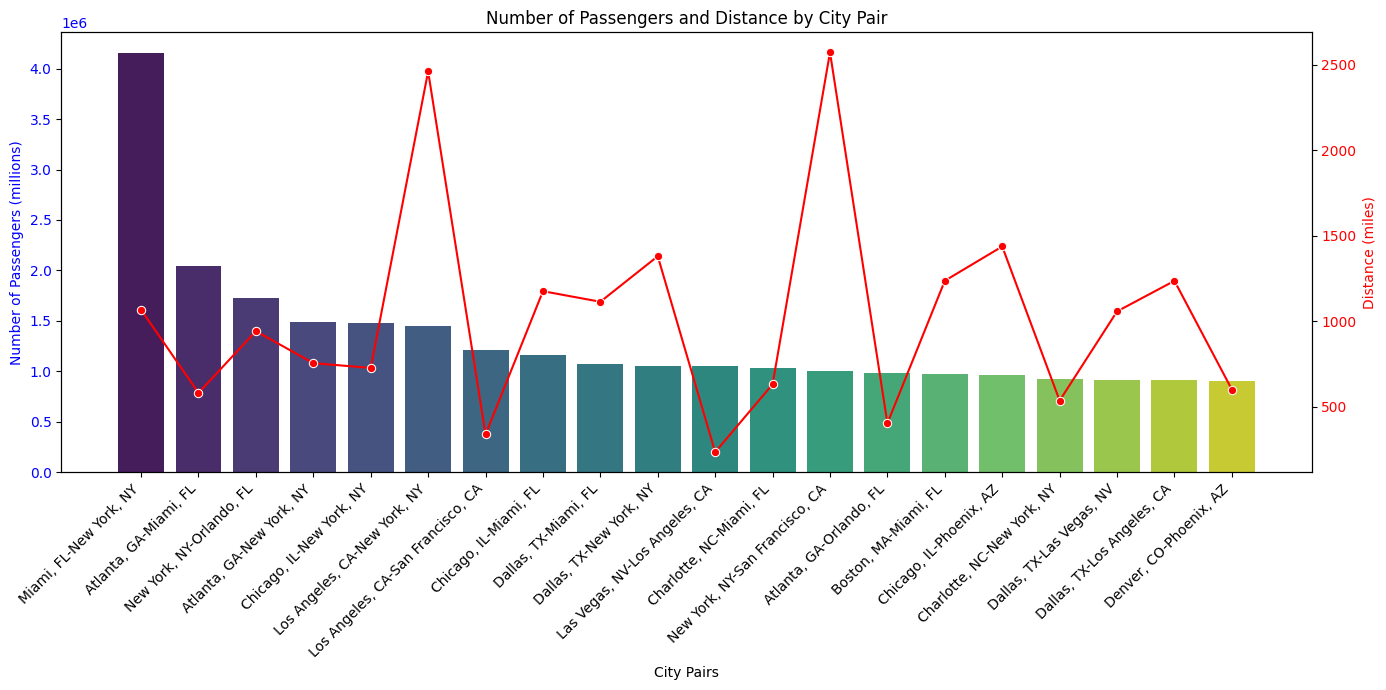

In [158]:
# Graph passengers and mean load factor
pass_graph = city_pair_info.sort_values(by='num_passengers', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for total passengers
sns.barplot(x='CityPair', y='num_passengers', data=pass_graph, palette="viridis", ax=ax1)
ax1.set_xlabel('City Pairs')
ax1.set_ylabel('Number of Passengers (millions)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot for distance
ax2 = ax1.twinx()
sns.lineplot(x='CityPair', y='avg_distance', data=pass_graph, color='r', marker='o', ax=ax2)
ax2.set_ylabel('Distance (miles)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Number of Passengers and Distance by City Pair')
plt.tight_layout()
plt.show()

/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/89553682.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityPair', y='num_passengers', data=pass_graph, palette="viridis", ax=ax1)
/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/89553682.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


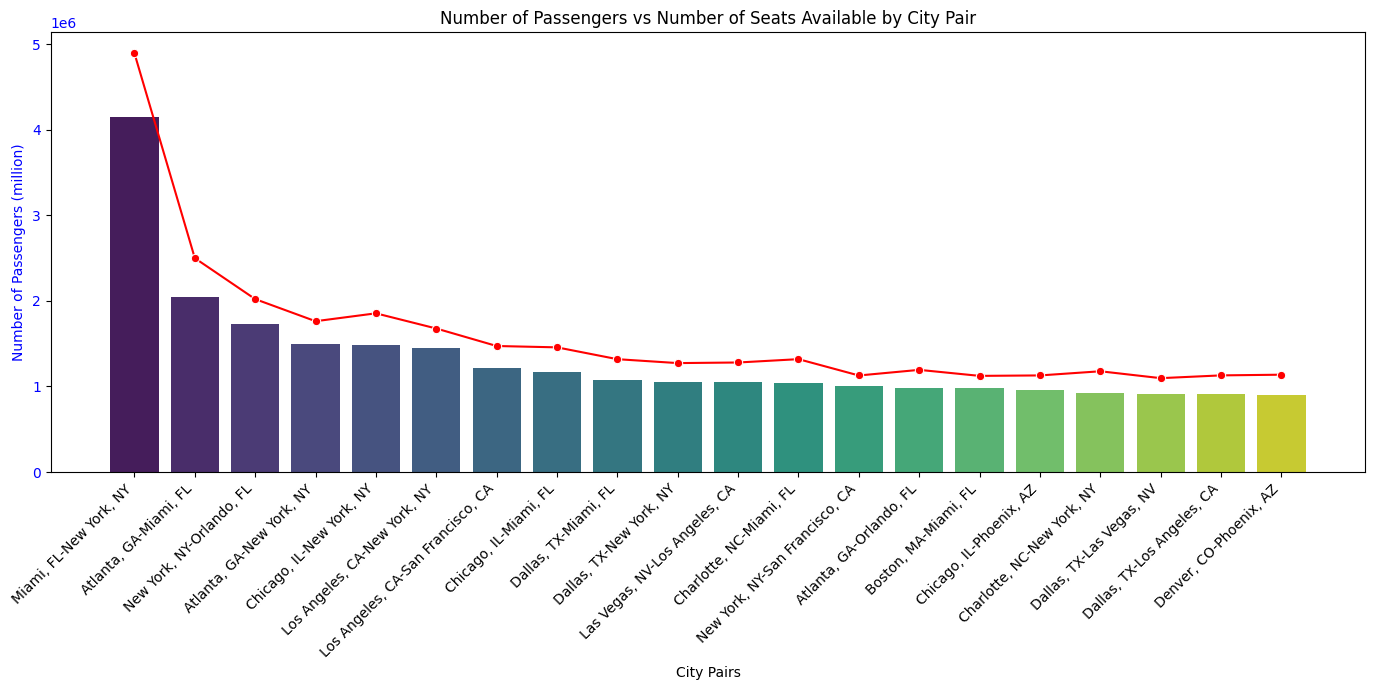

In [135]:
# Graph passengers and seats available
pass_graph = city_pair_info.sort_values(by='num_passengers', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for total passengers
sns.barplot(x='CityPair', y='num_passengers', data=pass_graph, palette="viridis", ax=ax1)
ax1.set_xlabel('City Pairs')
ax1.set_ylabel('Number of Passengers (million)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot for mean load factor

sns.lineplot(x='CityPair', y='total_seats', data=pass_graph, color='r', marker='o', ax=ax1)
# ax2.set_ylabel('Number of Seats Available', color='r')
# ax2.tick_params(axis='y', labelcolor='r')

plt.title('Number of Passengers vs Number of Seats Available by City Pair')
plt.tight_layout()
plt.show()

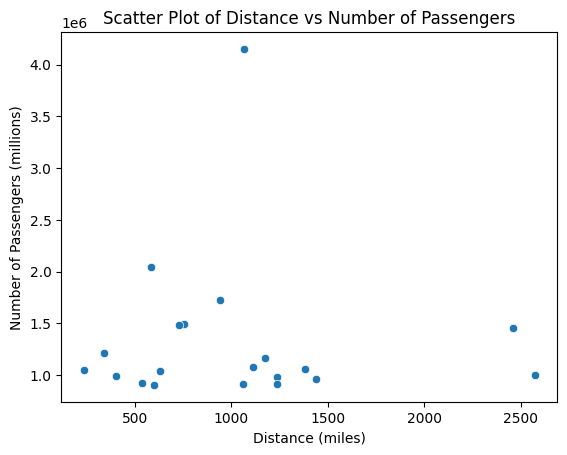

Pearson correlation: -0.012980394010218204
Spearman correlation: -0.06917293233082707


In [136]:
from scipy.stats import pearsonr, spearmanr
# Distance vs num passengers
# Scatter plot
sns.scatterplot(x='avg_distance', y='num_passengers', data=pass_graph)
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Passengers (millions)')
plt.title('Scatter Plot of Distance vs Number of Passengers')
plt.show()

# Pearson correlation
pearson_corr, _ = pearsonr(pass_graph['avg_distance'], pass_graph['num_passengers'])
print(f'Pearson correlation: {pearson_corr}')

# Spearman correlation
spearman_corr, _ = spearmanr(pass_graph['avg_distance'], pass_graph['num_passengers'])
print(f'Spearman correlation: {spearman_corr}')

/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/1923426570.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityPair', y='scheduled', data=dep_graph, palette="viridis", ax=ax1)
/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/1923426570.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dep_graph['CityPair'], rotation=45, ha='right')


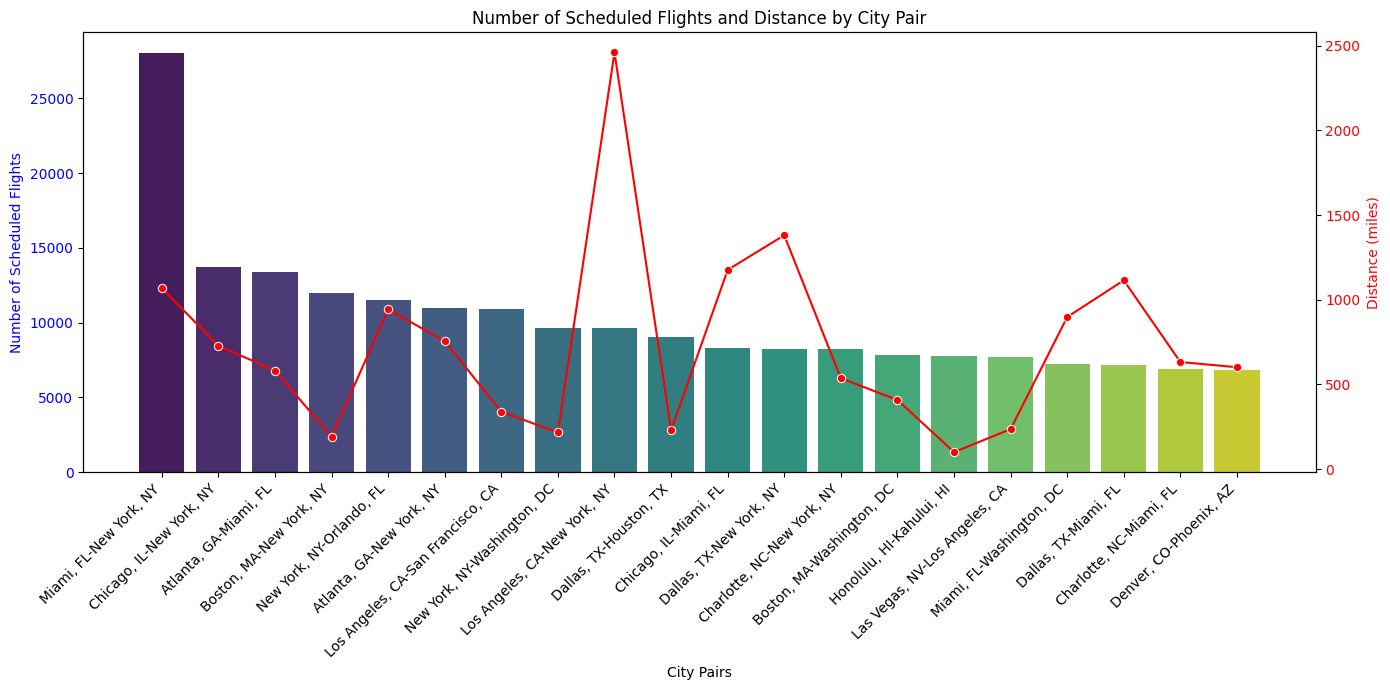

Pearson correlation: 0.11027909182511335
Spearman correlation: 0.022556390977443608


In [160]:
# Graph total_departures and scheduled and percent_cancelled
dep_graph = city_pair_info.sort_values(by='scheduled', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)

# Bar plot for total passengers
sns.barplot(x='CityPair', y='scheduled', data=dep_graph, palette="viridis", ax=ax1)
ax1.set_xlabel('City Pairs')
ax1.set_ylabel('Number of Scheduled Flights', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(dep_graph['CityPair'], rotation=45, ha='right')

# Line plot for distance
ax2 = ax1.twinx()
sns.lineplot(x='CityPair', y='avg_distance', data=dep_graph, color='r', marker='o', ax=ax2)
ax2.set_ylabel('Distance (miles)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Number of Scheduled Flights and Distance by City Pair')
plt.tight_layout()
plt.show()

# Pearson correlation
pearson_corr, _ = pearsonr(dep_graph['avg_distance'], dep_graph['scheduled'])
print(f'Pearson correlation: {pearson_corr}')

# Spearman correlation
spearman_corr, _ = spearmanr(dep_graph['avg_distance'], dep_graph['scheduled'])
print(f'Spearman correlation: {spearman_corr}')

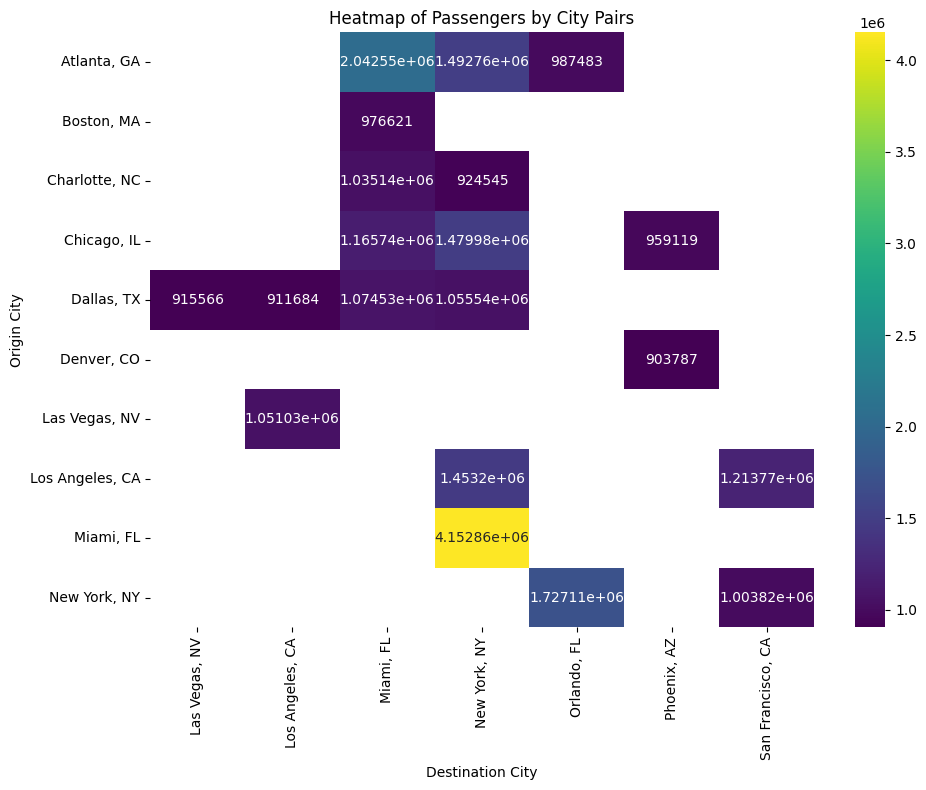

In [157]:
# Heatmap of passenger travel between cities
# Create a pivot table
hm_df = pass_graph.copy()
hm_df[['Origin', 'Destination']] = hm_df['CityPair'].str.split('-', expand=True)
pivot = hm_df.pivot_table(index='Origin', columns='Destination', values='num_passengers', aggfunc='sum')

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt="g", cmap='viridis')

# Add labels and title
plt.title('Heatmap of Passengers by City Pairs')
plt.xlabel('Destination City')
plt.ylabel('Origin City')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/3474763927.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityPair', y='num_carriers', data=carrier_graph, palette="viridis", ax=ax1)
/var/folders/dm/9dx6cd0s3db1wt_wv9gg8thm0000gn/T/ipykernel_58609/3474763927.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dep_graph['CityPair'], rotation=45, ha='right')


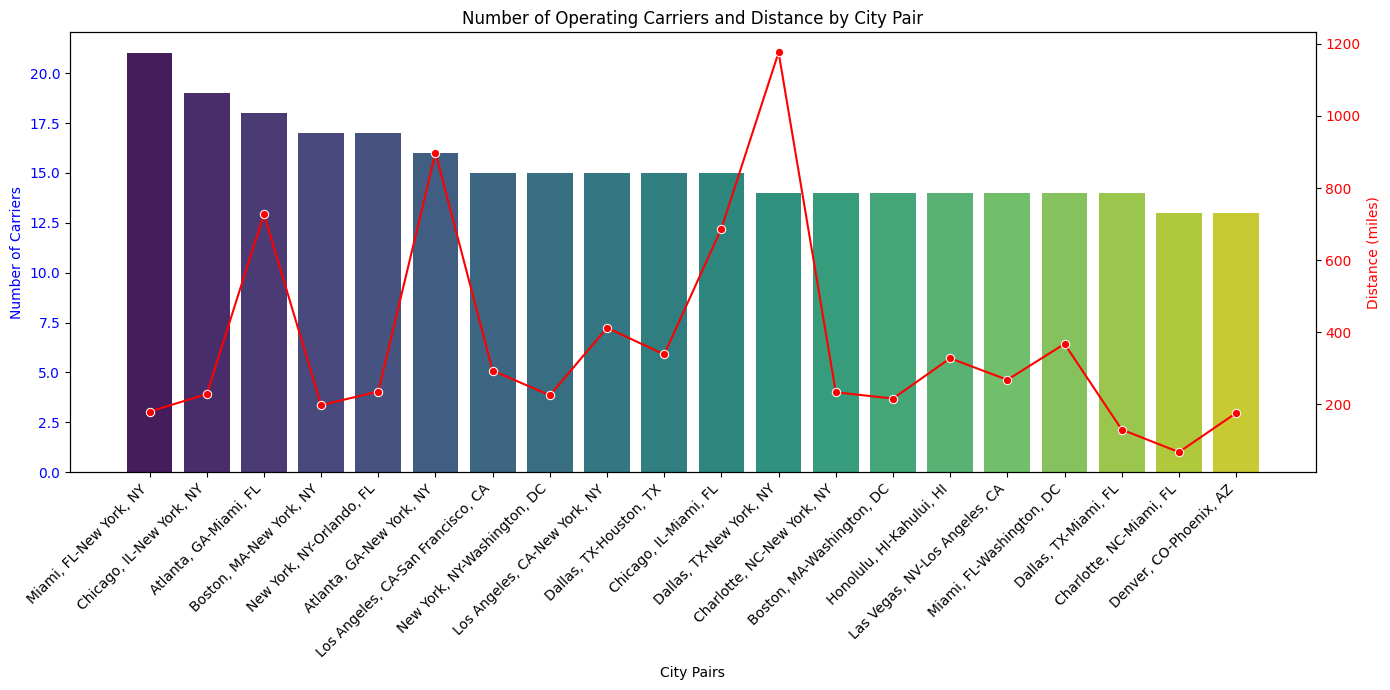

Pearson correlation: 0.013262632263547076
Spearman correlation: 0.21311043173605487


In [162]:
# Graph carriers and distance
carrier_graph = city_pair_info.sort_values(by='num_carriers', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)

# Bar plot for total passengers
sns.barplot(x='CityPair', y='num_carriers', data=carrier_graph, palette="viridis", ax=ax1)
ax1.set_xlabel('City Pairs')
ax1.set_ylabel('Number of Carriers', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(dep_graph['CityPair'], rotation=45, ha='right')

# Line plot for distance
ax2 = ax1.twinx()
sns.lineplot(x='CityPair', y='avg_distance', data=carrier_graph, color='r', marker='o', ax=ax2)
ax2.set_ylabel('Distance (miles)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Number of Operating Carriers and Distance by City Pair')
plt.tight_layout()
plt.show()

# Pearson correlation
pearson_corr, _ = pearsonr(carrier_graph['avg_distance'], carrier_graph['num_carriers'])
print(f'Pearson correlation: {pearson_corr}')

# Spearman correlation
spearman_corr, _ = spearmanr(carrier_graph['avg_distance'], carrier_graph['num_carriers'])
print(f'Spearman correlation: {spearman_corr}')